In [13]:
## Grover's Algorithm

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex

In [15]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

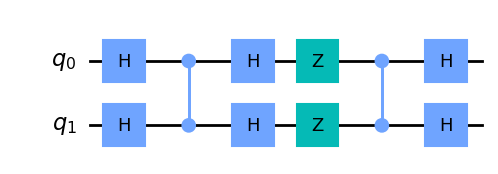

In [16]:
n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0, 1])
grover_circuit.cz(0, 1) # Oracle
# Diffusion operator (U_s)
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.draw('mpl')

In [17]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, sv_sim)
statevec = job_sim.result().get_statevector()
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

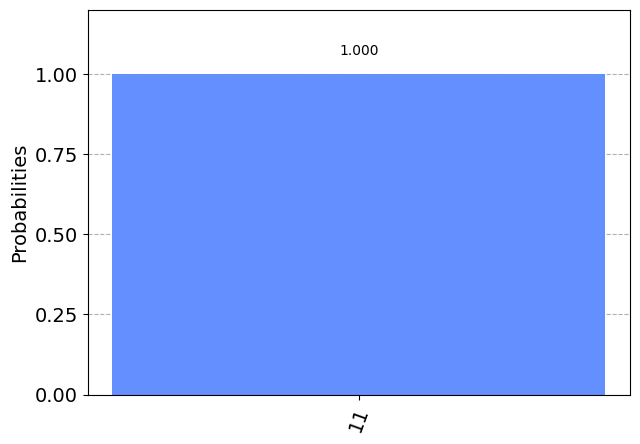

In [18]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
results = execute(grover_circuit, backend=backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

In [19]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [20]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation /s> -> /00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation /00..0> -> /11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation /11..1> -> /00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation /00..0> -> /s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

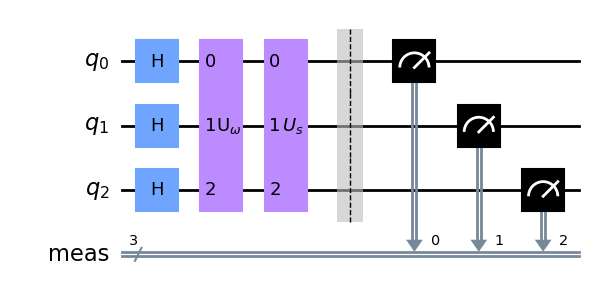

In [21]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0, 1, 2])
grover_circuit.append(oracle_ex3, [0, 1, 2])
grover_circuit.append(diffuser(n), [0, 1, 2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

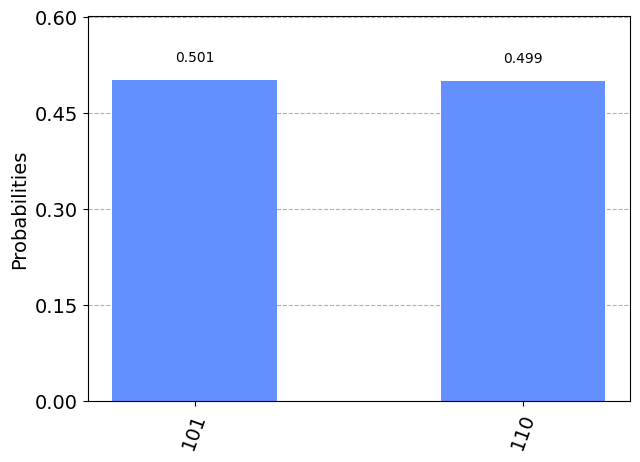

In [22]:
backend = Aer.get_backend('qasm_simulator')
results = execute(grover_circuit, backend=backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)